In [4]:
#1 [transforming the text files of mixture into list variables]


length = 720832  #要想辦法弄出來

g1 = open("in1.txt", "r")
g2 = open("in2.txt", "r")
g3 = open("time.txt", "r")

in1 = []
in2 = []
t = []

print('  Reading the txt. files and creating the list variables...')

for i in range(length):
    in1.append(float(g1.readline()))
    in2.append(float(g2.readline()))
    t.append(float(g3.readline()))
    
print('  Done!')

g1.close()
g2.close()
g3.close()

  Reading the txt. files and creating the list variables...
  Done!


Use the default parameters to generate the chaos (y/n)? y
Calculating and generating...
Integration successful.

  Signals from the chaos:


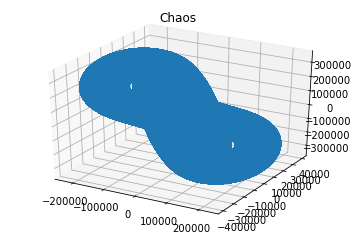

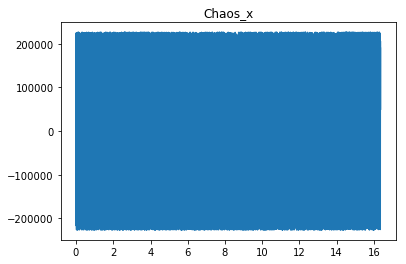

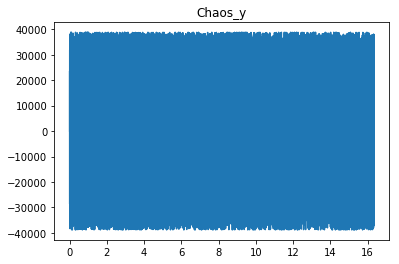

In [6]:
#2 [generating the chaos for decoding]

import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


#the parameters of generating the chaos
ans = input('Use the default parameters to generate the chaos (y/n)? ')
if ans == 'y':
    c0 = 15.6 * 600
    c1 = 1.0 * 600
    c2 = 28.0 * 600
    m0 = -1.143
    m1 = -0.714
if ans == 'n':
    print('Enter the values of the following parameters: ')
    c0 = float(input('c0 = '))
    c1 = float(input('c1 = '))
    c2 = float(input('c2 = '))
    m0 = float(input('m0 = '))
    m1 = float(input('m1 = '))


#chaos-generating functions calculating
def f(x):
    f = m1*x + (m0-m1)/2.0*(abs(x+1.0)-abs(x-1.0))
    return f

def dH_dt(H, t=0):
    return np.array([c0 * (H[1]-H[0]-f(H[0])),
                  c1 * (H[0]-H[1]+H[2]),
                  -c2 * H[1]])
    

#the initial conditions of x, y, and z
H0 = [0.7, 0.0, 0.0]


print('Calculating and generating...')

H, infodict = integrate.odeint(dH_dt, H0, t, full_output = True)  #這裡的t用到了聲音檔的t

print(infodict['message'])

print ("\n  Signals from the chaos:")

fig1 = plt.figure()
ax = fig1.add_subplot(111, projection = '3d')
ax.plot(H[:,0]*1e05, H[:,1]*1e05, H[:,2]*1e05)
plt.title("Chaos")
plt.show()

plt.plot(t, H[:,0]*1e05)
plt.title("Chaos_x")
plt.show()

plt.plot(t, H[:,1]*1e05)
plt.title("Chaos_y")
plt.show()

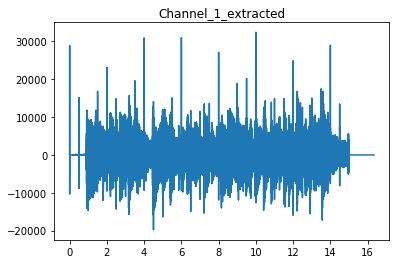

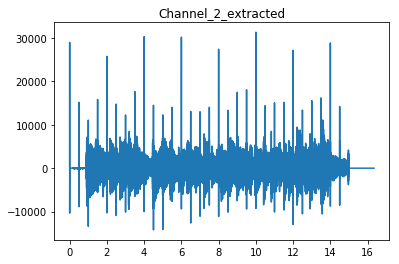

In [7]:
#3 [extracting the sound signals from the mixture]


# sound signals extracted from the mixture
ext1 = in1 - H[:,0]*1e05
ext2 = in2 - H[:,1]*1e05

plt.plot(t, ext1)
plt.title("Channel_1_extracted")
plt.show()

plt.plot(t, ext2)
plt.title("Channel_2_extracted")
plt.show()


In [10]:
#4 [transforming the results into .wav]

import wave

framerate = 44100
time = length / framerate

ext1_array = np.array([0.0] * length)
ext2_array = np.array([0.0] * length)


for l in range(length):
    ext1_array[l] = ext1[l]
    ext2_array[l] = ext2[l]


wave_data1 = ext1_array
wave_data1 = wave_data1.astype(np.short)

h1 = wave.open(r"ext1.wav", "wb")  # 打開.wav檔
h1.setnchannels(1)  #配置聲道數、量化位元數和取樣頻率
h1.setsampwidth(2)
h1.setframerate(framerate)
h1.writeframes(wave_data1.tostring())  #將wav_data轉換為二進位資料寫入檔

print("  File 'ext1.wav' created.")

h1.close()


wave_data2 = ext2_array
wave_data2 = wave_data2.astype(np.short)

h2 = wave.open(r"ext2.wav", "wb")
h2.setnchannels(1)
h2.setsampwidth(2)
h2.setframerate(framerate)
h2.writeframes(wave_data2.tostring())

print("  File 'ext2.wav' created.")

h2.close()


  File 'ext1.wav' created.
  File 'ext2.wav' created.


In [11]:
#5 [transforming the results into .txt]


f4= open("sound_ext1.txt", "w")
f5= open("sound_ext2.txt", "w")

print("  Writing the data into the text files...")

for i in range(length):
    f4.write(str(ext1[i]) + "\n")
    f5.write(str(ext2[i]) + "\n")
    
print('  Done!')

f4.close()
f5.close()

  Writing the data into the text files...
  Done!
